<a href="https://colab.research.google.com/github/Husted42/dataDrivenFinancialModels/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

# Task 2

## Task 2.1
Collect 10 years weekly data for McDonald, Coca Cola and Microsoft for the period 1st of January 1991 to 1st of January 2001

In [ ]:
tickers = ["MSFT", "MCD", "KO"] #MSFT = Microsoft, MCD = McDonalds, KO = Coca Cola
yf_pd = yf.download(tickers, "1991-01-01","2001-01-01", progress=False, interval="1wk")["Adj Close"]
yf_pd

Ticker,KO,MCD,MSFT
Date,,,
1991-01-01 00:00:00+00:00,2.476541,3.503225,0.639934
1991-01-08 00:00:00+00:00,2.476541,3.423244,0.655959
1991-01-15 00:00:00+00:00,2.678851,3.679188,0.764930
1991-01-22 00:00:00+00:00,2.657923,3.551215,0.788433
1991-01-29 00:00:00+00:00,2.692804,3.743173,0.847191
...,...,...,...
2000-11-28 00:00:00+00:00,15.880553,17.298340,17.364746
2000-12-05 00:00:00+00:00,14.799151,16.472973,17.864737
2000-12-12 00:00:00+00:00,13.926753,17.779797,14.711000


## Task 2.2
Calculate the continuous returns of each of the stocks

In [ ]:
log_returns = np.log((yf_pd / yf_pd.shift(1))[1:])
log_returns

Ticker,KO,MCD,MSFT
Date,,,
1991-01-08 00:00:00+00:00,0.000000,-0.023095,0.024732
1991-01-15 00:00:00+00:00,0.078525,0.072103,0.153686
1991-01-22 00:00:00+00:00,-0.007843,-0.035402,0.030263
1991-01-29 00:00:00+00:00,0.013038,0.052644,0.071880
1991-02-05 00:00:00+00:00,0.072441,0.025318,0.050411
...,...,...,...
2000-11-28 00:00:00+00:00,0.052132,-0.015779,-0.225135
2000-12-05 00:00:00+00:00,-0.070525,-0.048890,0.028387
2000-12-12 00:00:00+00:00,-0.060758,0.076342,-0.194233


## Task 2.3
Calculate the mean and covariance matrix for the yearly returns of the stocks

In [ ]:
yearly_log_returns = log_returns.groupby(log_returns.index.year).sum()
yearly_log_returns

Ticker,KO,MCD,MSFT
Date,,,
1991,0.642341,0.396303,0.847535
1992,0.025403,0.205600,0.091695
1993,0.073888,0.146012,-0.060533
1994,0.163539,0.047245,0.422481
1995,0.379819,0.440661,0.361571
1996,0.359471,0.000498,0.653926
1997,0.241999,0.063408,0.435143
1998,0.019656,0.487868,0.771492
1999,-0.165178,0.034266,0.502815


In [ ]:
yearly_log_returns.mean()

,0
Ticker,
KO,0.183174
MCD,0.167529
MSFT,0.303758


In [ ]:
yearly_log_returns.cov()

Ticker,KO,MCD,MSFT
Ticker,,,
KO,0.053098,0.016105,0.041667
MCD,0.016105,0.044566,0.064748
MSFT,0.041667,0.064748,0.284348


## Task 2.4
Consider the portfolios each having different choice over the assets such that we cover all the following possibilities
[0, 0, 1]
[0, 0.1, 0.9]
[0.1, 0.1, 0.8]
...
[0.9, 0.1, 0]
[1, 0, 0]

In [ ]:
# Generate all combinations of stocks using list that sum to one
# [0,0,1], [0, 0.1, 0.9], [0.1, 0.1, 0.8], [0.1, 0.2, 0.7]
cool_lst = []

for x in range(0, 11):
  for y in range(0, 11):
    for z in range(0, 11):
      if x/10 + y/10 + z/10 == 1:
        cool_lst.append([x/10, y/10, z/10])

print(cool_lst)

[[0.0, 0.0, 1.0], [0.0, 0.1, 0.9], [0.0, 0.2, 0.8], [0.0, 0.3, 0.7], [0.0, 0.4, 0.6], [0.0, 0.5, 0.5], [0.0, 0.6, 0.4], [0.0, 0.7, 0.3], [0.0, 0.8, 0.2], [0.0, 0.9, 0.1], [0.0, 1.0, 0.0], [0.1, 0.0, 0.9], [0.1, 0.1, 0.8], [0.1, 0.2, 0.7], [0.1, 0.3, 0.6], [0.1, 0.4, 0.5], [0.1, 0.5, 0.4], [0.1, 0.6, 0.3], [0.1, 0.7, 0.2], [0.1, 0.8, 0.1], [0.1, 0.9, 0.0], [0.2, 0.0, 0.8], [0.2, 0.1, 0.7], [0.2, 0.2, 0.6], [0.2, 0.3, 0.5], [0.2, 0.4, 0.4], [0.2, 0.5, 0.3], [0.2, 0.6, 0.2], [0.2, 0.8, 0.0], [0.3, 0.0, 0.7], [0.3, 0.1, 0.6], [0.3, 0.2, 0.5], [0.3, 0.3, 0.4], [0.3, 0.4, 0.3], [0.3, 0.5, 0.2], [0.3, 0.7, 0.0], [0.4, 0.0, 0.6], [0.4, 0.1, 0.5], [0.4, 0.2, 0.4], [0.4, 0.3, 0.3], [0.4, 0.4, 0.2], [0.4, 0.5, 0.1], [0.4, 0.6, 0.0], [0.5, 0.0, 0.5], [0.5, 0.1, 0.4], [0.5, 0.2, 0.3], [0.5, 0.3, 0.2], [0.5, 0.4, 0.1], [0.5, 0.5, 0.0], [0.6, 0.0, 0.4], [0.6, 0.1, 0.3], [0.6, 0.2, 0.2], [0.6, 0.4, 0.0], [0.7, 0.0, 0.3], [0.7, 0.1, 0.2], [0.7, 0.3, 0.0], [0.8, 0.0, 0.2], [0.8, 0.1, 0.1], [0.8, 0.2, 0.

### Task 2.4.1
For each of the portfolios calculate the yearly mean and yearly standard deviation. Create a similar graph to figure 4.5 in the lecture of mean against standard deviation

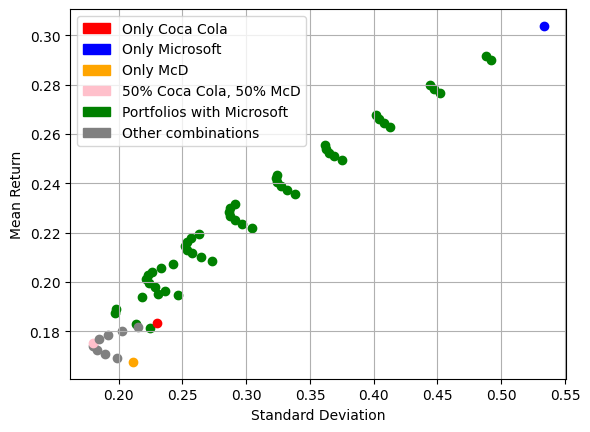

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

portfolio_means = []
portfolio_stds = []
color_map = []

fig, ax = plt.subplots()

i = 0
for portfolio in cool_lst:
  i = i + 1
  portfolio_return = np.dot(portfolio, yearly_log_returns.mean())
  portfolio_std = np.sqrt(np.dot(np.array(portfolio).T, np.dot(yearly_log_returns.cov(), portfolio)))
  portfolio_means.append(portfolio_return)
  portfolio_stds.append(portfolio_std)
  if portfolio == [1, 0, 0]: # Coca Cola
    scattter = ax.scatter(portfolio_std, portfolio_return, c = 'red')
  elif portfolio == [0, 0, 1]: # Microsoft
    scattter = ax.scatter(portfolio_std, portfolio_return, c = 'blue')
  elif portfolio == [0, 1, 0]: # McD
    scattter = ax.scatter(portfolio_std, portfolio_return, c = 'orange')
  elif portfolio == [0.5, 0.5, 0]: # Highest ratio : 50% Coca Cola and 50% McD
    scattter = ax.scatter(portfolio_std, portfolio_return, c = 'pink')
  elif portfolio[2] != 0: # Everything with Microsoft
    scattter = ax.scatter(portfolio_std, portfolio_return, c = 'green')
  else:
    scattter = ax.scatter(portfolio_std, portfolio_return, c = 'grey')

red_patch = mpatches.Patch(color='red', label='Only Coca Cola')
blue_patch = mpatches.Patch(color='blue', label='Only Microsoft')
orange_patch = mpatches.Patch(color='orange', label='Only McD')
pink_patch = mpatches.Patch(color='pink', label='50% Coca Cola, 50% McD')
green_patch = mpatches.Patch(color='green', label='Portfolios with Microsoft')
grey_patch = mpatches.Patch(color='grey', label='Other combinations')

ax.legend(handles=[red_patch, blue_patch, orange_patch, pink_patch, green_patch, grey_patch])
ax.set_xlabel("Standard Deviation")
ax.set_ylabel("Mean Return")
ax.grid(True)

plt.show()

## Task 2.4.2
Which of the portfolios has the maximal mean?

In [76]:
idx = np.argmax(portfolio_means)
print(idx, ":", cool_lst[idx], ":", portfolio_means[idx])

0 : [0.0, 0.0, 1.0] : 0.30375816094240005


## Task 2.4.3
Which of the portfolios has the lowest standard deviation?

In [77]:
idx = np.argmin(portfolio_stds)
print(idx, ":", cool_lst[idx], ":", portfolio_stds[idx])

42 : [0.4, 0.6, 0.0] : 0.17963886291644354


## Task 2.4.4
Which of the portfolios has the highest ratio of mean to stdev $(\frac{\mu_x}{\sigma_x})$ ? why is this portfolio interesting?


In [78]:
np_mean = np.array(portfolio_means)
np_std = np.array(portfolio_stds)

np_ratio = np_mean / np_std
idx = np.argmax(np_ratio)
print(np_ratio)
print(idx, ":", cool_lst[idx])
print(idx, ":", np_ratio[idx])

[0.56964286 0.58926959 0.61148202 0.63659767 0.66482814 0.69607769
 0.7295305  0.7628791  0.79111381 0.80534096 0.7935694  0.59748309
 0.62132027 0.64858554 0.67970351 0.71487401 0.75365572 0.79410256
 0.83121896 0.85501987 0.85049054 0.62933735 0.65834043 0.6918189
 0.73024756 0.77356241 0.82024995 0.86553801 0.90195236 0.66561755
 0.70079299 0.74158693 0.78824709 0.83965953 0.89137491 0.94263206
 0.70636148 0.74845689 0.79696926 0.85104428 0.90650617 0.95227495
 0.96742266 0.75065546 0.79937277 0.85375542 0.9097414  0.95645089
 0.97314144 0.79554299 0.84791842 0.90124551 0.95979233 0.83438562
 0.88245651 0.93047746 0.85565159 0.88571816 0.89005535 0.84522383
 0.84351665 0.79491983]
48 : [0.5, 0.5, 0.0]
48 : 0.9731414381559206
